<a href="https://colab.research.google.com/github/ayanch07/Generate-Handwritten-Digits/blob/main/DigitRecog_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit recignition using pytorch

In [43]:
# importing required libraries
import torch
import torchvision
from torchvision.datasets import MNIST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset

In [44]:
dataset = MNIST(root='data/', download=True)

In [45]:
len(dataset)

60000

In [46]:
test_dataset = MNIST(root='data/', train = False)
len(test_dataset)

10000

In [47]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FE08719D6D0>, 5)

Label: 5


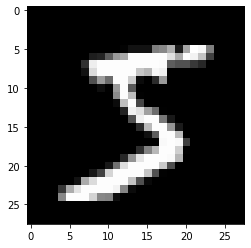

In [48]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

In [49]:
import torchvision.transforms as transforms

In [50]:
#converting PIL image to pytorch tensor
dataset = MNIST(root='data/',
                train = True,
                transform = transforms.ToTensor())


In [51]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [52]:
# converted to 1 by 28 by 28 tensor, here 1 implies grayscale

In [53]:
print(img_tensor[0,10:15,10:15])

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


In [54]:
from torch.utils.data.dataset import random_split
#Training and validation datasets

from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000, 10000]) # splits into 50k and 10k
len(train_ds), len(val_ds)

(50000, 10000)

In [55]:
from torch.utils.data import DataLoader
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

### Model

In [56]:
# logistic regression model, pred = x @ w.t() + b
# We can use nn.Linear after flattening teh matrix

In [57]:
import torch.nn as nn

input_size = 28*28
num_classes = 10
model = nn.Linear(input_size, num_classes)

print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0016,  0.0002,  0.0239,  ..., -0.0010, -0.0174, -0.0291],
        [ 0.0062, -0.0297,  0.0031,  ...,  0.0116,  0.0292, -0.0021],
        [-0.0276, -0.0064,  0.0120,  ..., -0.0349, -0.0065, -0.0106],
        ...,
        [ 0.0148, -0.0356,  0.0067,  ..., -0.0247,  0.0066, -0.0099],
        [-0.0081, -0.0198, -0.0186,  ...,  0.0179,  0.0142,  0.0040],
        [-0.0025, -0.0238,  0.0206,  ..., -0.0118,  0.0357,  0.0305]],
       requires_grad=True)

In [58]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0003,  0.0255, -0.0063,  0.0303, -0.0345,  0.0063,  0.0308,  0.0267,
         0.0052,  0.0317], requires_grad=True)

In [127]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break
# It was re-run after flattening the image to correct the size

tensor([2, 7, 9, 5, 1, 7, 9, 0, 2, 0, 3, 4, 5, 3, 6, 8, 1, 6, 3, 0, 1, 8, 3, 2,
        0, 6, 4, 9, 7, 6, 9, 9, 3, 5, 9, 1, 0, 2, 9, 4, 7, 2, 0, 9, 3, 7, 3, 9,
        3, 4, 0, 0, 4, 1, 6, 7, 1, 9, 3, 1, 7, 2, 5, 9, 8, 0, 0, 5, 6, 3, 1, 0,
        1, 0, 2, 3, 7, 8, 7, 8, 6, 7, 4, 7, 3, 0, 8, 9, 5, 8, 1, 3, 6, 7, 0, 6,
        5, 7, 9, 8, 5, 1, 9, 4, 3, 8, 7, 6, 7, 2, 2, 5, 5, 3, 0, 6, 0, 2, 4, 0,
        8, 8, 0, 0, 8, 4, 3, 7])
torch.Size([128, 1, 28, 28])
tensor([[-2.1228, -0.9261,  4.6970,  ..., -0.0546, -0.3025,  0.4535],
        [ 2.2885, -6.5565, -5.3480,  ...,  7.7270, -0.2032,  4.4702],
        [-2.5869, -2.5159, -0.1893,  ...,  2.6626, -0.1483,  4.5632],
        ...,
        [-3.2319, -2.2432, -0.6940,  ..., -2.1336,  2.9852,  0.3082],
        [-1.0693,  0.4968, -0.1088,  ..., -1.5191,  1.9119, -0.2450],
        [-4.7372, -2.7555,  3.1772,  ...,  4.9049,  0.0595,  1.8884]],
       grad_fn=<AddmmBackward0>)


In [60]:
images.shape

torch.Size([128, 1, 28, 28])

In [61]:
images.reshape(128, 28*28).shape ## flattening

torch.Size([128, 784])

In [64]:
# extend the functionality of nn.Module to include flatten basically

class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes) #defining model.linear

  def forward(self, xb):
    xb = xb.reshape(-1, 784) # batch ## -1 to generalize the model not hardcode
    out = self.linear(xb)
    return out

model = MnistModel()


In [65]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [69]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0039,  0.0275, -0.0097,  ...,  0.0200, -0.0338, -0.0231],
         [-0.0065, -0.0290,  0.0165,  ..., -0.0006,  0.0323,  0.0181],
         [ 0.0031,  0.0339,  0.0162,  ...,  0.0103,  0.0276,  0.0082],
         ...,
         [-0.0192,  0.0094, -0.0094,  ..., -0.0068,  0.0148, -0.0065],
         [-0.0066,  0.0231, -0.0224,  ...,  0.0051, -0.0189, -0.0268],
         [-0.0035,  0.0171, -0.0317,  ...,  0.0316,  0.0356, -0.0061]],
        requires_grad=True), Parameter containing:
 tensor([-0.0280,  0.0299,  0.0081, -0.0006,  0.0263,  0.0067,  0.0259,  0.0267,
         -0.0226,  0.0270], requires_grad=True)]

In [71]:
for images, labels in train_loader:
  print(images.shape)
  outputs = model(images)
  break
print(outputs.shape)
print(outputs[:2].data)

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])
tensor([[-0.2411,  0.0489, -0.1616,  0.1226, -0.0487,  0.1409,  0.0629, -0.1016,
         -0.2392,  0.0394],
        [ 0.1370,  0.2614, -0.1880,  0.3960, -0.0405,  0.5026,  0.0877,  0.2525,
         -0.0029,  0.2203]])


In [73]:
# Softmax, each output should represent probablity
import torch.nn.functional as F

In [74]:
outputs[:2]

tensor([[-0.2411,  0.0489, -0.1616,  0.1226, -0.0487,  0.1409,  0.0629, -0.1016,
         -0.2392,  0.0394],
        [ 0.1370,  0.2614, -0.1880,  0.3960, -0.0405,  0.5026,  0.0877,  0.2525,
         -0.0029,  0.2203]], grad_fn=<SliceBackward0>)

In [77]:
probs = F.softmax(outputs, dim = 1)
print('sSample probs', probs[:2].data)

sSample probs tensor([[0.0809, 0.1081, 0.0876, 0.1163, 0.0980, 0.1185, 0.1096, 0.0930, 0.0810,
         0.1071],
        [0.0956, 0.1083, 0.0691, 0.1239, 0.0800, 0.1378, 0.0910, 0.1073, 0.0831,
         0.1039]])


In [79]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 5, 9, 6, 5, 7, 5, 3, 5, 1, 5, 5, 5, 7, 8, 7, 3, 5, 4, 7, 5, 5, 6, 1,
        5, 9, 4, 5, 6, 5, 5, 3, 4, 7, 3, 5, 5, 3, 4, 7, 7, 5, 3, 5, 5, 3, 3, 5,
        7, 5, 7, 5, 5, 5, 5, 3, 5, 3, 5, 6, 7, 4, 3, 7, 5, 3, 5, 5, 3, 4, 7, 7,
        1, 8, 7, 5, 4, 9, 5, 5, 6, 7, 0, 9, 5, 3, 5, 5, 9, 7, 4, 7, 7, 4, 4, 4,
        5, 5, 1, 7, 3, 9, 5, 5, 5, 4, 5, 5, 6, 5, 5, 3, 5, 1, 3, 3, 5, 5, 7, 5,
        7, 3, 5, 4, 3, 4, 5, 5])
tensor([0.1185, 0.1378, 0.1237, 0.1358, 0.1158, 0.1185, 0.1466, 0.1344, 0.1549,
        0.1175, 0.1567, 0.1547, 0.1244, 0.1368, 0.1152, 0.1186, 0.1288, 0.1617,
        0.1491, 0.1150, 0.1183, 0.1305, 0.1436, 0.1163, 0.1345, 0.1228, 0.1313,
        0.1194, 0.1398, 0.1412, 0.1291, 0.1308, 0.1333, 0.1312, 0.1146, 0.1347,
        0.1388, 0.1138, 0.1550, 0.1311, 0.1169, 0.1267, 0.1267, 0.1229, 0.1113,
        0.1574, 0.1221, 0.1269, 0.1165, 0.1339, 0.1256, 0.1179, 0.1317, 0.1486,
        0.1225, 0.1169, 0.1174, 0.1266, 0.1401, 0.1226, 0.1226, 0.1252, 0.1174,
       

In [80]:
# It makes sense if the probablities are close to 10%

In [81]:
# Evaluatin Metric and loss function
torch.sum(preds == labels)

tensor(12)

In [82]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

accuracy(outputs, labels)

tensor(0.0938)

In [85]:
# makes sense if it is 1/10 * 1/10 ie around 1%
#For the loss function, accuracy doesn't work (no grad) thus we
# use cross entropy
outputs

tensor([[-0.2411,  0.0489, -0.1616,  ..., -0.1016, -0.2392,  0.0394],
        [ 0.1370,  0.2614, -0.1880,  ...,  0.2525, -0.0029,  0.2203],
        [-0.0666, -0.0570,  0.1758,  ...,  0.0757, -0.1436,  0.3134],
        ...,
        [ 0.1208,  0.1483,  0.0520,  ..., -0.2137, -0.0015,  0.0367],
        [ 0.0453, -0.0986, -0.1180,  ..., -0.0185, -0.0353,  0.0300],
        [-0.0816, -0.0306, -0.0989,  ..., -0.1250,  0.2584, -0.1755]],
       grad_fn=<AddmmBackward0>)

In [86]:
loss_fn = F.cross_entropy

In [87]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2896, grad_fn=<NllLossBackward0>)


### Training the model
Pseudo code
```
for epoch in range(num_epochs):
  #Training phase
  for batch in train_loader:
    Generate predictiions
    Calculate loss
    Compute gradients
    Update weights
    Reset gradients
  
  #Validation phase
  for batch in val_loader:
    Generate predictions
    Calculate loss
    Calculate metrices (accuracy, etc)
  Calculate average validation loss and metrics
  Log epoch, loss and metrics for inspection
```
Some parts - viz, loss function, metrics etc are specific to our problem
but others are generic to any deep learning problem

In [97]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = []  # to record epoch wise results

  for epoch in range(epochs):

    #Training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Validation Phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history


In [92]:
# We need to define evaluation etc

In [91]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

Finally, let's redefine the MnistModel class to include additional methods training_step, validation_step, validation_epoch_end, and epoch_end used by fit and evaluate

In [93]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
  
  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out
  def training_step(self, batch):
    images, labels = batch
    out = self(images) #Generate preds
    loss = F.cross_entropy(out, labels) # calc loss
    return loss
  
  def validation_step(self, batch):
    images, labels = batch
    out = self(images)  #generate preds
    loss = F.cross_entropy(out, labels) #calc loss
    acc = accuracy(out, labels) #calc accuracy
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean() #Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()  # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()


In [94]:
# Before training
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.1214398741722107, 'val_loss': 2.302419662475586}

In [98]:
#After 5 epochs
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9271, val_acc: 0.6574
Epoch [1], val_loss: 1.6606, val_acc: 0.7422
Epoch [2], val_loss: 1.4626, val_acc: 0.7746
Epoch [3], val_loss: 1.3131, val_acc: 0.7934
Epoch [4], val_loss: 1.1980, val_acc: 0.8042


In [100]:
history2 = fit(5, 0.005, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7653, val_acc: 0.8458
Epoch [1], val_loss: 0.6777, val_acc: 0.8542
Epoch [2], val_loss: 0.6215, val_acc: 0.8600
Epoch [3], val_loss: 0.5823, val_acc: 0.8641
Epoch [4], val_loss: 0.5527, val_acc: 0.8657


In [101]:
history3 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5475, val_acc: 0.8668
Epoch [1], val_loss: 0.5426, val_acc: 0.8675
Epoch [2], val_loss: 0.5380, val_acc: 0.8683
Epoch [3], val_loss: 0.5336, val_acc: 0.8692
Epoch [4], val_loss: 0.5294, val_acc: 0.8704
Epoch [5], val_loss: 0.5253, val_acc: 0.8705
Epoch [6], val_loss: 0.5215, val_acc: 0.8710
Epoch [7], val_loss: 0.5178, val_acc: 0.8716
Epoch [8], val_loss: 0.5142, val_acc: 0.8722
Epoch [9], val_loss: 0.5107, val_acc: 0.8723


In [102]:
history4 = fit(80, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5074, val_acc: 0.8727
Epoch [1], val_loss: 0.5043, val_acc: 0.8735
Epoch [2], val_loss: 0.5012, val_acc: 0.8741
Epoch [3], val_loss: 0.4982, val_acc: 0.8748
Epoch [4], val_loss: 0.4953, val_acc: 0.8752
Epoch [5], val_loss: 0.4926, val_acc: 0.8756
Epoch [6], val_loss: 0.4899, val_acc: 0.8758
Epoch [7], val_loss: 0.4873, val_acc: 0.8769
Epoch [8], val_loss: 0.4847, val_acc: 0.8772
Epoch [9], val_loss: 0.4823, val_acc: 0.8774
Epoch [10], val_loss: 0.4799, val_acc: 0.8778
Epoch [11], val_loss: 0.4776, val_acc: 0.8784
Epoch [12], val_loss: 0.4754, val_acc: 0.8789
Epoch [13], val_loss: 0.4732, val_acc: 0.8789
Epoch [14], val_loss: 0.4711, val_acc: 0.8789
Epoch [15], val_loss: 0.4690, val_acc: 0.8791
Epoch [16], val_loss: 0.4670, val_acc: 0.8795
Epoch [17], val_loss: 0.4651, val_acc: 0.8797
Epoch [18], val_loss: 0.4632, val_acc: 0.8796
Epoch [19], val_loss: 0.4614, val_acc: 0.8800
Epoch [20], val_loss: 0.4596, val_acc: 0.8798
Epoch [21], val_loss: 0.4578, val_acc: 0.880

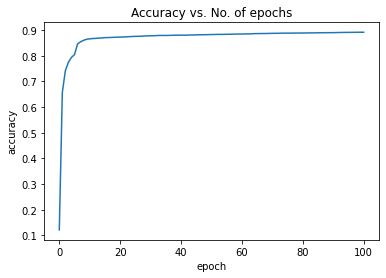

In [116]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [104]:
torch.save(model.state_dict(), 'mnist-logistic.pth') #saved the traind model
model.state_dict() # saved parameters

OrderedDict([('linear.weight',
              tensor([[-0.0315,  0.0196, -0.0272,  ..., -0.0016, -0.0216, -0.0067],
                      [-0.0023,  0.0178, -0.0160,  ..., -0.0076, -0.0342, -0.0286],
                      [-0.0150,  0.0186,  0.0303,  ..., -0.0112,  0.0338, -0.0078],
                      ...,
                      [-0.0030,  0.0246, -0.0011,  ...,  0.0057,  0.0132,  0.0191],
                      [-0.0109,  0.0259,  0.0238,  ..., -0.0329, -0.0170,  0.0287],
                      [ 0.0079,  0.0057,  0.0114,  ..., -0.0017,  0.0039, -0.0103]])),
             ('linear.bias',
              tensor([-0.1066,  0.2107, -0.0344, -0.0598,  0.0667,  0.2147, -0.0316,  0.1318,
                      -0.3778, -0.0283]))])

In [117]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


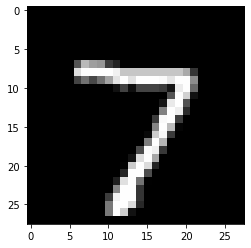

In [118]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [122]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

def print_pred(test_data):
  img, label = test_data
  plt.imshow(img[0], cmap='gray')
  print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 7 , Predicted: 7


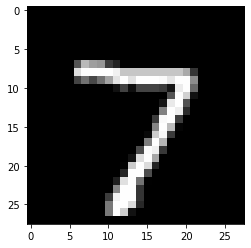

In [123]:
print_pred(test_dataset[0])

Label: 3 , Predicted: 3


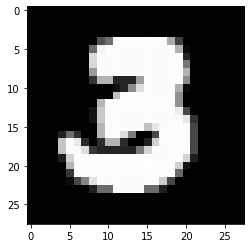

In [124]:
print_pred(test_dataset[200])

### Test

In [126]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.9012695550918579, 'val_loss': 0.3731919527053833}

The accuracy on test dataset is 90.12% and loss is 0.373. This is a satisfactory result


---


